### Cargar librerias

In [1]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Cargar datos y crear DF

In [2]:
df = pd.DataFrame(pd.read_csv('marketing_campaign.csv', sep='\t'))
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Identifiquemos las columnas 

**People**

- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in customer's household
- **Teenhome:** Number of teenagers in customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise


**Products**

- **MntWines:** Amount spent on wine in last 2 years
- **MntFruits:** Amount spent on fruits in last 2 years
- **MntMeatProducts:** Amount spent on meat in last 2 years
- **MntFishProducts:** Amount spent on fish in last 2 years
- **MntSweetProducts:** Amount spent on sweets in last 2 years
- **MntGoldProds:*** Amount spent on gold in last 2 years


**Promotion**

- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise


**Place**

- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to company’s website in the last month

### Verificación de valores inapropiados

In [3]:
# Como el df tiene tantas columnas lo transformé en un dict para verlo mejor
description = df.describe()
description = description.to_dict()
pprint(description)

{'AcceptedCmp1': {'25%': 0.0,
                  '50%': 0.0,
                  '75%': 0.0,
                  'count': 2240.0,
                  'max': 1.0,
                  'mean': 0.06428571428571428,
                  'min': 0.0,
                  'std': 0.24531597433401},
 'AcceptedCmp2': {'25%': 0.0,
                  '50%': 0.0,
                  '75%': 0.0,
                  'count': 2240.0,
                  'max': 1.0,
                  'mean': 0.013392857142857142,
                  'min': 0.0,
                  'std': 0.11497560625548155},
 'AcceptedCmp3': {'25%': 0.0,
                  '50%': 0.0,
                  '75%': 0.0,
                  'count': 2240.0,
                  'max': 1.0,
                  'mean': 0.07276785714285715,
                  'min': 0.0,
                  'std': 0.25981306992189157},
 'AcceptedCmp4': {'25%': 0.0,
                  '50%': 0.0,
                  '75%': 0.0,
                  'count': 2240.0,
                  'max': 1.0,
          

**Interpretación:**

De lo anterior vemos que no hay datos con valores inapropiados (negativos) o con algún valor que no parezca razonable, en los valores binarios tampoco se ve inconsistencias al momento. Llama la atención los valores máximos de niños en casa o adolescentes que en ambos casos sus valores son 2.

### Análisis de valores nulos y tipos de datos.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

No hay valores nulos, los tipos de datos parecenestar bien a excepcion del Dt_Customer que tiene un tipo de dato string, lo convertiremos a fecha ya que nos podría ser de utilidad más adelante 

In [5]:
df = df.astype({'Dt_Customer': 'datetime64[ms]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ms]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Registros duplicados

In [6]:
df[df.duplicated(keep=False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [7]:
df[df['ID'].duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


**Interpretación:**

Con lo anterior quería comprobar si habían registros totalmente duplicados y segundo si había un ID duplicado, es decir el mismo cliente en varios registros pero con diferente información. Como vemos no hay duplicados.

### Valores únicos

Vamos a analizar los valores únicos solo para las variables categóricas 'Education' y 'Marital_Status'

In [8]:
cat_names = ['Education', 'Marital_Status']
unique_values = {col: df[col].unique() for col in cat_names}

pprint(unique_values)

{'Education': array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object),
 'Marital_Status': array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)}


**Interpretación:**

No hay valores inconsistentes o duplicados para las variables categoricas.

### Visualizaciones 

Vamosa incluir algunas visualizaciones que nos permitan tener un mejor panorama del dataset de cara a hacer la clusterización. Además haremos inegniería de caracteristicas añadiendo nuevas variables que nospermitan tener información valiosa.

### Visualización distribución de la edad

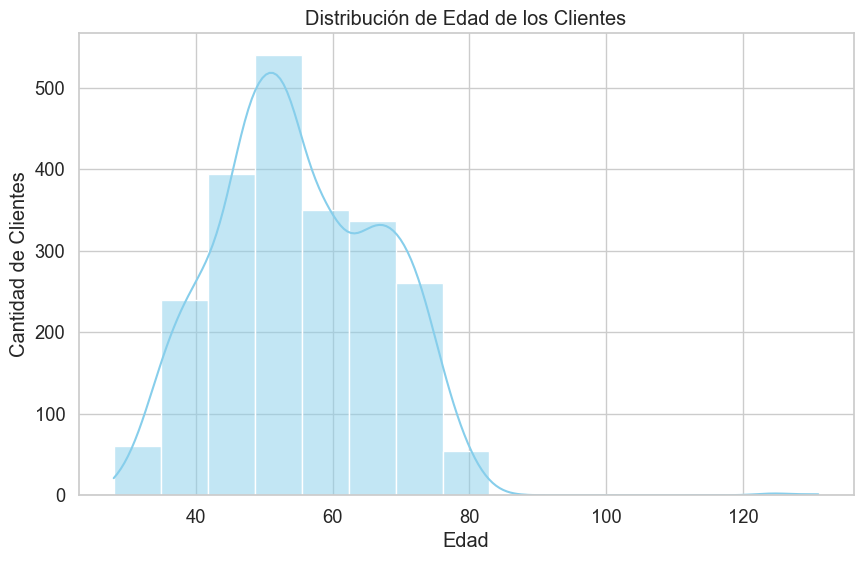

In [9]:
# Creamos la columna de Edad usando el año de nacimiento
# El dataset fue subido en 2023, entonces calculemos la edad que tendrían los clientes a día de hoy
df['Age'] = 2024 - df['Year_Birth']

# Configuremos el estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Gráfico de distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.show();


**Análisis:**

Como primera impresión podemos decir que la edad presenta una distribución normal y que la mayoría de los cliente se encuentran en un rango de entre los 40 y los 70 años aproximadamente. Esto nos da una buena idea inicial del tipo de clientes que estamos analizando.

### Ingresos VS Gasto en Vinos

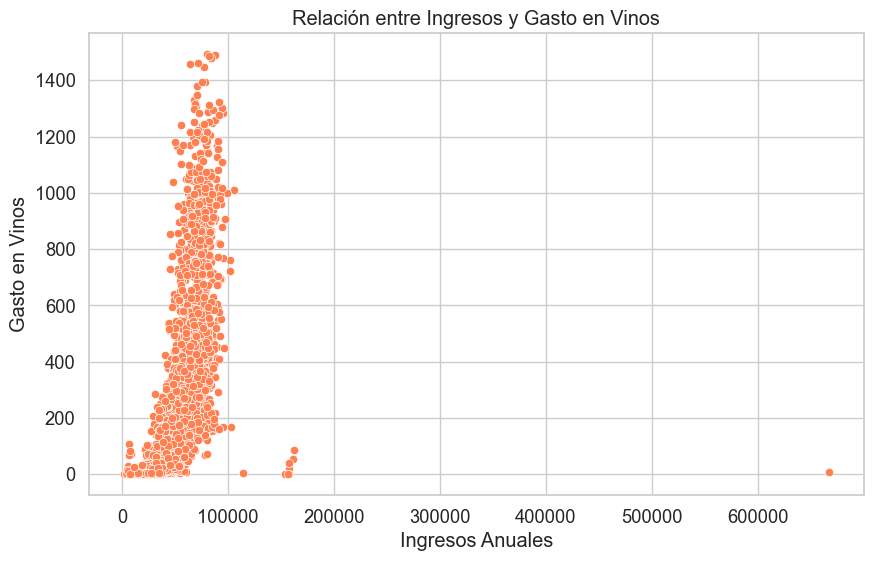

In [10]:
# Gráfico de dispersión de Ingresos vs Gasto en Vinos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', data=df, color='coral')
plt.title('Relación entre Ingresos y Gasto en Vinos')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Gasto en Vinos')
plt.show();

**Análisis:**

Un gráfico interesante nos muestra que personas con pocos ingresos no gastan mucho e vino pero a aprtir de cierto nivel de ingresos sise gasta más en este producto lo cual podría permitir hacer un enfoque en la venta de vinos a las personas por encima de cierto nivel de ingresos.

### Número de hijos vs gasto total

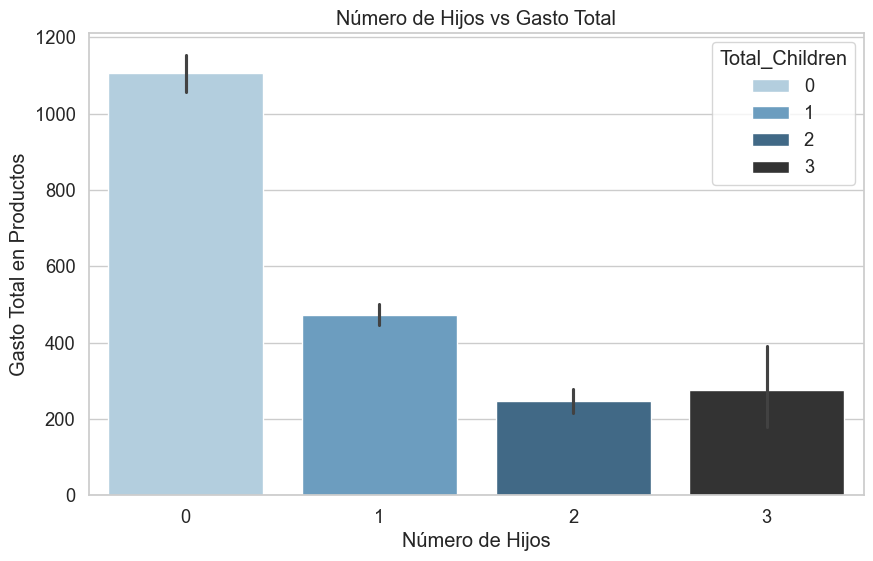

In [11]:
# Crear columna del total de hijos y del gasto total para tener una visión global de hijos y el gasto por cliente
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Gráfico de barras: Hijos vs Gasto total
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Children', y='Total_Spend', data=df, palette='Blues_d', hue='Total_Children')
plt.title('Número de Hijos vs Gasto Total')
plt.xlabel('Número de Hijos')
plt.ylabel('Gasto Total en Productos')
plt.show();

**Análisis:**

Vemos que hay una relación inversamente proporcional entre el número de hijos y el gasto total, lo cual nos da información importante para hacer foco en las personas que no tienen hijos.

### Estado Civil vs Ingresos

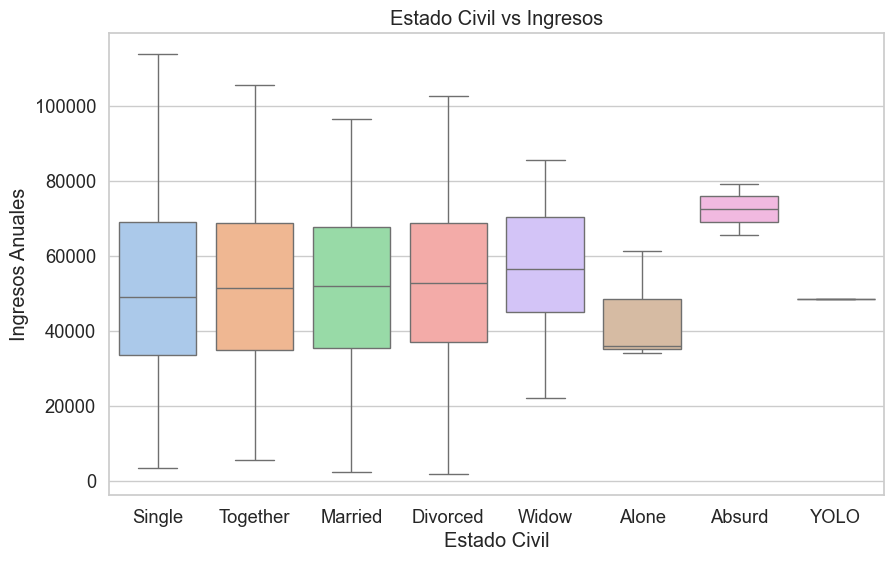

In [12]:
# Gráfico de cajas: Estado Civil vs Ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Income', data=df, palette='pastel', hue='Marital_Status', showfliers=False)
plt.title('Estado Civil vs Ingresos')
plt.xlabel('Estado Civil')
plt.ylabel('Ingresos Anuales')
plt.show()

**Análisis:**

El gráfico nos muestro que la diferencia en poder adquisitvo entre las personas que están solas y las que tienen pareja no es mucha a excepción de las personas de la categoría absurd que tienen un pensamiento más liberal sus ingresos están por encima de los otros estados. 

### Métodos de compra

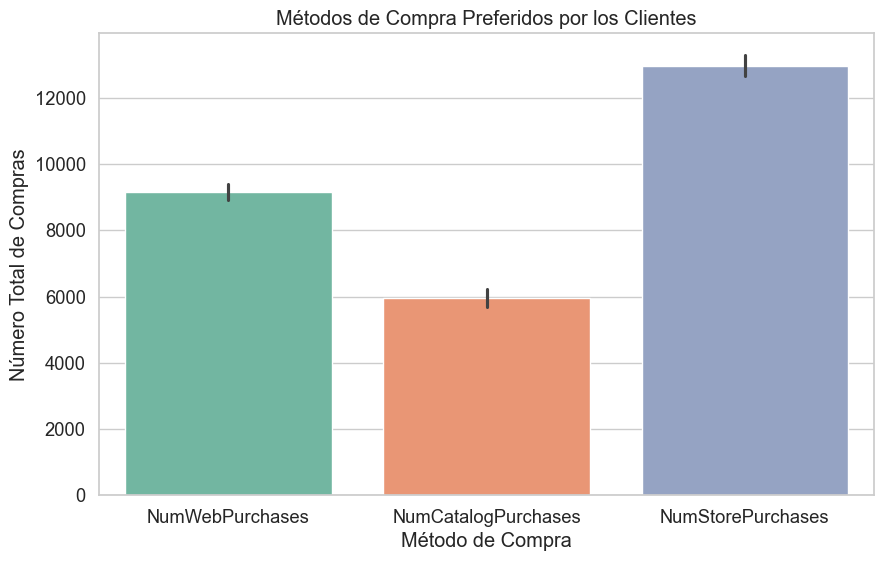

In [17]:
# Creemos un DF solo para los métodos de compra
df_compras = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].melt(var_name='Purchase Method', value_name='Purchases')

# Gráfico de barras para métodos de compra
plt.figure(figsize=(10, 6))
sns.barplot(x='Purchase Method', y='Purchases', data=df_compras, estimator=sum, palette='Set2', hue='Purchase Method')
plt.title('Métodos de Compra Preferidos por los Clientes')
plt.xlabel('Método de Compra')
plt.ylabel('Número Total de Compras')
plt.show()

**Análisis:**

Vemos que las compras en tienda dominan sobre las otras opciones a pesar de que lascompras por internet han ganado terreno en los últimos años, también se podría explicar este comportamiento por la edad de los consumidores ya que son de la generación donde todas las compras se hacían en los respectivos lugares.

### DF final y exportación 

Ahora exportemos el df con las nuevas variables para usar en otros archivos.

In [20]:
# df.to_csv('df.csv')